# First steps - and a little of statistics - in pandas

Pandas is, in the proper's [pandas](https://pandas.pydata.org/) words:

<cite>a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.</cite>

## 1. Importing pandas

In [1]:
import pandas as pd

## 2. Creating and visualizing tabular data

In **pandas** we work with tabular data, more specifically, a **DataFrame**. A **DataFrame** is composed of _rows_ and _columns_ that are easily represented by its _labels_. If you want you can say that each column is a `series` and a sequence of series forms the `DataFrame`.

Formally speaking, a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) is a two-dimensional, size-mutable, potentially heterogeneous tabular data.

### 2.1 Using dictionary

One way to create a pandas data frame is writing a dictionary:

In [2]:
dogs = {
    'Breed': ['Akita', 'Beagle', 'Collie'],
    'Group': ['Working', 'Hound', 'Hound'],
    'Weight': [45, 11, 22],
    'Life span': [11, 14, 12]
}

Creating a dogs data frame:

In [3]:
df_dogs = pd.DataFrame(dogs)

Visualizing data frame:

In [4]:
df_dogs

,Breed,Group,Weight,Life span
0,Akita,Working,45,11
1,Beagle,Hound,11,14
2,Collie,Hound,22,12


Notice that the first column have only numbers. They are the DataFrame **indexes**. To create your own index column you can just pass:

In [5]:
df_dogs = pd.DataFrame(dogs, index = ['a', 'b', 'c'])

In [6]:
df_dogs

,Breed,Group,Weight,Life span
a,Akita,Working,45,11
b,Beagle,Hound,11,14
c,Collie,Hound,22,12


Or you can use the property `index` as:

In [7]:
df_dogs.index = [0, 1, 2]
df_dogs

,Breed,Group,Weight,Life span
0,Akita,Working,45,11
1,Beagle,Hound,11,14
2,Collie,Hound,22,12


### 2.2 Using lists

Writing a cat's list:

In [8]:
cats = [['Abyssinian', 3.6, 12], ['Bengal', 6.4, 14], ['Manx', 5, 11]]

Creating a dictionary:

In [9]:
df_cats = pd.DataFrame(cats, columns = ['Breed', 'Weight', 'Life span'])

Note that we have used the variable `columns` as a list giving the readers for each data frame column.

In [10]:
df_cats

,Breed,Weight,Life span
0,Abyssinian,3.6,12
1,Bengal,6.4,14
2,Manx,5.0,11


If you just leave out the headers:

In [11]:
df_cats = pd.DataFrame(cats)
df_cats

,0,1,2
0,Abyssinian,3.6,12
1,Bengal,6.4,14
2,Manx,5.0,11


You can include them later in the data frame using the `columns` property:

In [12]:
headers = ['Breed', 'Weight', 'Life span']
df_cats.columns = headers
df_cats

,Breed,Weight,Life span
0,Abyssinian,3.6,12
1,Bengal,6.4,14
2,Manx,5.0,11


### 2.3 Using numpy arrays

Importing [numpy](https://numpy.org/):

In [13]:
import numpy as np

Creating data:

In [14]:
x = np.linspace(0.1, 10, 100)
y = np.logspace(0, 100, 100)
fx = 4.*x + 10
gy = (np.exp(y/5000.))**2

/home/natalidesanti/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


_The above warning was made with a later intention!_

Generating a data frame:

In [15]:
data = np.array([x, y, fx, gy]).T
columns = ['x', 'y', 'f (x)', 'g (y)']
df_arrays = pd.DataFrame(data, columns = columns)

Visualizing just a part of the data frame using the method `head`:

In [16]:
df_arrays.head()

,x,y,f (x),g (y)
0,0.1,1.000000,10.4,1.000400
1,0.2,10.235310,10.8,1.004103
2,0.3,104.761575,11.2,1.042795
3,0.4,1072.267222,11.6,1.535578
4,0.5,10974.987655,12.0,80.640021


If you want to see just a specific number of rows, give it as the argument of `head`:

In [17]:
df_arrays.head(3)

,x,y,f (x),g (y)
0,0.1,1.000000,10.4,1.000400
1,0.2,10.235310,10.8,1.004103
2,0.3,104.761575,11.2,1.042795


For instance, if you are interested in the bottom of the data frame, use the method `tail`:

In [18]:
df_arrays.tail()

,x,y,f (x),g (y)
95,9.6,9.111628e+95,48.4,inf
96,9.7,9.326033e+96,48.8,inf
97,9.8,9.545485e+97,49.2,inf
98,9.9,9.770100e+98,49.6,inf
99,10.0,1.000000e+100,50.0,inf


Note that there is $\infty$ values in this data set (those previous mentioned in the warning message). We are handle them in a minutes.

## 3. Saving data frame to a csv

Using the method `to_csv` you can save your data as a readable `csv` file, giving the specific path and name, followed by `.csv` extension:

In [19]:
df_arrays.to_csv('df_arrays.csv', index = False)

The option `index = False` was used to save the data set without the index column.

## 4. Importing and visualizing data frames

### 4.1 From file

You just need to specify the path and file name (of course with its extension):

In [20]:
df_funcs = pd.read_csv('df_arrays.csv')

In [21]:
df_funcs.head()

,x,y,f (x),g (y)
0,0.1,1.000000,10.4,1.000400
1,0.2,10.235310,10.8,1.004103
2,0.3,104.761575,11.2,1.042795
3,0.4,1072.267222,11.6,1.535578
4,0.5,10974.987655,12.0,80.640021


### 4.2 From a link

Here we are calling for the [Wine Quality Data Set](http://archive.ics.uci.edu/ml/datasets/Wine+Quality) just calling the link:

In [22]:
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

Creating the data frame using the method `read_csv`:

In [23]:
df_wine = pd.read_csv(path, sep=';')

In [24]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


See that this `csv` file are not comma separated, it has semicolon instead and need to be 'fixed' before starting working with it. Then, I have used `sep = ';'` as option into `read_csv`.

### 4.3 From `scikitlearn.datasets`

Python's library [`scikit learn`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) has an amazing data set library to Data Science and Machine Learnin practices. But it does not come directly as `csv` format. Then, we need to convet it as a simple task. To use it you need to lad the libary:

In [25]:
from sklearn.datasets import load_boston

Loading data, that is in `Bunch` format:

In [26]:
boston = load_boston()
type(boston)

sklearn.utils.Bunch

We have a description of this dataset using `DESCR`:

In [27]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Using `feature names` method we can extract exactly the feature names:

In [28]:
features = boston.feature_names
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Using `data` property we have all data as an `numpy array`:

In [29]:
boston_data = boston.data
boston_data.shape

(506, 13)

Then, we can convert to a data frame doing:

In [30]:
df_boston = pd.DataFrame(boston_data, columns = features)

And we got:

In [31]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


You can know more about your data just using `.info()` method:

In [32]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


As you can see, the function `.info()` provides essential details about your dataset, such as the its type, the number of rows and columns, the number of non-null values, what type of data is in each column, and how much memory your data frame is using.

## 5. Selecting and Replacing Data

### 5.1 Missing values

In data science we call `NaN` values as **missing values**. Sometimes, they are just $\pm \infty$. Then, we can replace them by `NaN` doing:

In [33]:
df_funcs = df_funcs.replace([np.inf, -np.inf], np.nan)

We can check if there is `NaN` values using `.isnull()` function:

In [34]:
df_funcs.isnull()

,x,y,f (x),g (y)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
95,False,False,False,True
96,False,False,False,True
97,False,False,False,True
98,False,False,False,True


This returns a boolean value, indicating wheter the value that is passed into the argument is, in fact, missing data.

Finally, we can replace those values using the function `fillna` and choosing, for example, $0$ to replace its values.

In [35]:
df_funcs = df_funcs.fillna(0) 
df_funcs.tail()

,x,y,f (x),g (y)
95,9.6,9.111628e+95,48.4,0.0
96,9.7,9.326033e+96,48.8,0.0
97,9.8,9.545485e+97,49.2,0.0
98,9.9,9.770100e+98,49.6,0.0
99,10.0,1.000000e+100,50.0,0.0


In [36]:
df_funcs.head()

,x,y,f (x),g (y)
0,0.1,1.000000,10.4,1.000400
1,0.2,10.235310,10.8,1.004103
2,0.3,104.761575,11.2,1.042795
3,0.4,1072.267222,11.6,1.535578
4,0.5,10974.987655,12.0,80.640021


### 5.2 Data selection

We can select some data, throwing away the same that we don't need in your data analysis. For instance, we can keep just $y <= 1e10$ in `df_arrays` doing:

In [37]:
df_funcs = df_funcs[df_funcs['y'] <= 1e10]

Then, if we take a look:

In [38]:
df_funcs.tail()

,x,y,f (x),g (y)
5,0.6,1.123324e+05,12.4,3.266910e+19
6,0.7,1.149757e+06,12.8,5.410625e+199
7,0.8,1.176812e+07,13.2,0.000000e+00
8,0.9,1.204504e+08,13.6,0.000000e+00
9,1.0,1.232847e+09,14.0,0.000000e+00


In [39]:
df_funcs.head()

,x,y,f (x),g (y)
0,0.1,1.000000,10.4,1.000400
1,0.2,10.235310,10.8,1.004103
2,0.3,104.761575,11.2,1.042795
3,0.4,1072.267222,11.6,1.535578
4,0.5,10974.987655,12.0,80.640021


### 5.3 Replacing data

If you want to replace some of your data, for example, the $g (y) = 0$ by, for instance, $1$, you can perform:

In [40]:
df_funcs['g (y)'].replace(0, 1, inplace = True)

In [41]:
df_funcs.tail()

,x,y,f (x),g (y)
5,0.6,1.123324e+05,12.4,3.266910e+19
6,0.7,1.149757e+06,12.8,5.410625e+199
7,0.8,1.176812e+07,13.2,1.000000e+00
8,0.9,1.204504e+08,13.6,1.000000e+00
9,1.0,1.232847e+09,14.0,1.000000e+00


### 5.3 Data transformation

You can transform one column of your data set just applying your transformation diferently to that column:

In [42]:
df_funcs['x'] = 20.*df_funcs['x'] - 1.0
df_funcs['f (x)'] = df_funcs['f (x)']/3. + 10.
df_funcs.tail()

,x,y,f (x),g (y)
5,11.0,1.123324e+05,14.133333,3.266910e+19
6,13.0,1.149757e+06,14.266667,5.410625e+199
7,15.0,1.176812e+07,14.400000,1.000000e+00
8,17.0,1.204504e+08,14.533333,1.000000e+00
9,19.0,1.232847e+09,14.666667,1.000000e+00


Or you can apply some transformation directly to your entire data set doing:

In [43]:
df_funcs = np.log10(df_funcs)

In [44]:
df_funcs.head()

,x,y,f (x),g (y)
0,0.000000,0.000000,1.129260,0.000174
1,0.477121,1.010101,1.133539,0.001778
2,0.698970,2.020202,1.137776,0.018199
3,0.845098,3.030303,1.141972,0.186272
4,0.954243,4.040404,1.146128,1.906551


## 6. Statistics

### 6.1 Descriptive statistics

The first thing that you can do to better undestand your data set is to analyze its **descriptive statistics** using the function `.describe()`. It provides the central tendency, dispersion and shape of a dataset's distribution. By default you will have `count`, `mean`, `std`, `min`, `25 %`, `50 %`, `75 %` and `max` values from each column. One advantage of doing this is that these statistics could be kept in another data set, to use its values afterwards:

In [45]:
statistics = df_boston.describe()

In [46]:
statistics

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


And, of course, you can use this method for each separeted collumn that you want:

In [47]:
df_boston['B'].describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

### 6.2 Descriptive statistics separately

You can compute separately a lot of other statistic values. For example:

| Function | Description | 
|--------|-------------|
| .count()| Nuber of non-null observables |
| .mean() | Mean of Values |
| .median() | Median of Values |
| .mode() | Mode of values |
| .std() | Standard Deviation of the Values |
| .min() | Minimum Value |
| .max() | Maximum Value |

In [48]:
mean_B = df_boston['B'].mean()
std_B = df_boston['B'].std()
mean_B, std_B

(356.6740316205534, 91.29486438415783)

### 6.3 Frequency of all values in some column

In [49]:
df_boston['B'].value_counts()

396.90    121
395.24      3
393.74      3
393.23      2
394.72      2
         ... 
394.46      1
288.99      1
390.30      1
248.31      1
390.50      1
Name: B, Length: 357, dtype: int64

### 6.4 Data Correlation

You can compute the correlation from each continuous variable in the columns, as well save it as another data frame, just doing:

In [50]:
corr = df_boston.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


The correlation method used is by default pearson correlation, but you can change it passing: `method = 'X'`, as the argument of the function.

You can see the correlation in a pretty way doing:

In [51]:
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


For a 'fancy' plot, you can use:

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1, 'Correlation Heatmap')

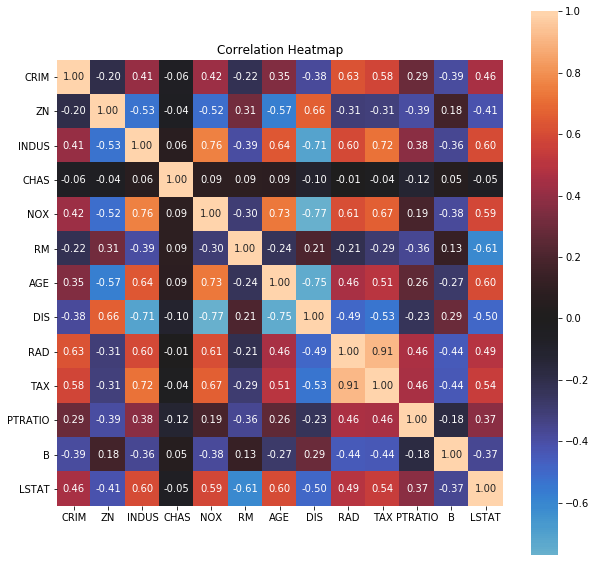

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmax=1.0, center=0, fmt='.2f', square=True, annot=True)
plt.title('Correlation Heatmap')

### 6.5 Histogram

If you want to create an histogram you can use your data frame too, just passing some collumn, for example:

Text(0.5, 0, 'AGE')

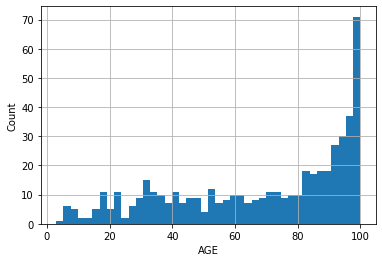

In [54]:
df_boston['AGE'].hist(bins = 42)
plt.ylabel('Count')
plt.xlabel('AGE')

You can use your own definition of bins defining, for instance $3$ age bins using maximum and minimum values:

In [55]:
bins = np.linspace( min(df_boston['AGE']), max(df_boston['AGE']), 4)
bins

array([  2.9       ,  35.26666667,  67.63333333, 100.        ])

Giving the bins names:

In [56]:
names = ['Low age', 'Medium age', 'High age']

And use the `.cut()` function to determine what each value belongs too:

In [57]:
df_boston['AGE-binned'] = pd.cut(df_boston['AGE'], bins, labels = names, include_lowest = True )
df_boston[['AGE','AGE-binned']].sample(10)

,AGE,AGE-binned
47,85.5,High age
462,83.0,High age
333,38.1,Medium age
81,70.4,High age
102,85.4,High age
97,76.0,High age
456,87.9,High age
495,28.8,Low age
328,25.8,Low age
148,93.8,High age


Note that, the `.sample()` method have sampled the DataFrame! It is useful to have well representative pieces from some dataset when you are arranging it in parts.

Finally, we can plot:

Text(0, 0.5, 'Counts')

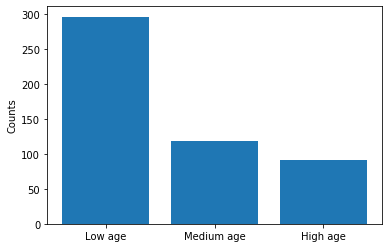

In [58]:
plt.bar(names, df_boston["AGE-binned"].value_counts())
plt.ylabel('Counts')

### 6.6 Grouping data

Using the above group you can extract statistics from that `grouping` using the function `.groupby()`. For example, computing the mean age for each bin, we have:

In [59]:
df_boston.groupby(['AGE-binned'])['AGE'].mean()

AGE-binned
Low age       22.835165
Medium age    51.242017
High age      89.605068
Name: AGE, dtype: float64

## 7. References

See the references along this notebook too:

- [Python Pandas Tutorial](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/)

- [Boston Dataset](https://www.engineeringbigdata.com/boston-dataset-scikit-learn-machine-learning-in-python/)

- [Pandas getting started](https://pandas.pydata.org/docs/getting_started/index.html)

- [Pandas stack overflow](https://stackoverflow.com/questions/tagged/pandas)

- [Data sets](https://machinelearningmastery.com/standard-machine-learning-datasets/)